Lecture Notes for session conducted on September 16, 2022

https://www.scaler.com/academy/mentee-dashboard/class/36605/session

**Content**

1.   Code for ADAM (Adaptive Moment Estimation) Optimizer.
2.   Denoising AE.
3.   Practical tips.
4.   Disadvantages of MLPs: Need for CNN and RNN.

***Question:*** Do we need to do batch normalization before or after activation function? either way it helps us to avoid exploding gradient but i'm thinking doing it before activation makes more sense (computation purpose)>

***Answer:***
- Suppose we have a neuron with some weight vector, bias and inputs as shown in diagram below.
- Batch Normalization $BN(ReLu(w^Tx_i+b))$ makes more logical sense. We do Batch Normalization on outputs of neurons. Reason being these  become input to some other neurons.
- Distribution of $Ƶ_i$ could be changing. Hence we do BN i.e. we center/scale this output.
  <img src='https://drive.google.com/uc?id=1Mpbi-JOeGFK2A3CXnvYp8X8jycnpcIkK'>


***Question:*** In autoencoders MLP connected through input and output. Output layer which expects same  input. (e.g) (prediect-original)=zero. In that case we discussed, no. of less neurons in between MLP represent (bottleneck) lower dimension. Can I say each hidden layer in my MLP represents
input in various dimension?

***Answer:***
- The Encoder layer tries to compress $784$-dim to $32$-dim and Decoder layer decompresses and tried to get as close as possible to input.
  <img src='https://drive.google.com/uc?id=1Z-fJSuaXJu8P8HsvrSu27VsTKdYZu0W8'>

- Yes, we can say that each hidder layer represents input in various dimension. For e.g. in the below figure, we can say that output of first layer is encoded in $128$-dim representation of input and so on.
  <img src='https://drive.google.com/uc?id=11RZfBI6rWSgYB9sQIXnPm9q1zOk61-SU'>  


***Question:*** Can you please explain dead neurons?

***Answer:***
- Problem of dead neurons happens when we have ReLU activation.
- Imagine we have neuron with ReLu activation. It has bunch of weights, input and output. ReLu activation function says that if $ReLu(Ƶ_i) = (w^Tx_i+b) > 0$ then output = $Ƶ_i$ and 0 otherwise.
- Imagine we have $w_1$ as weight, $O_1$ is output and loss at the end. Let $(w^Tx_i+b)<0$, which means $Ƶ_i \le 0$, then $ReLU(Ƶ_i) = 0$. Then output $O_1 = 0$.
- Derivative of $ReLu(Ƶ_i) = 1$ for $Ƶ_i > 0$ and 0 otherwise.
  <img src='https://drive.google.com/uc?id=1t-p6o-PMo-mKjo2juxIvcumOMIkJMNX0'>
- Problem here is that to update $w_1$, we need to compute $\frac{\partial L}{ \partial w_1} = \frac{\partial L}{ \partial O_1} * \frac{\partial O_1}{ \partial w_1}$.
- $\frac{\partial O_1}{ \partial w_1} = \frac{\partial ReLu(w_1x_1+...)}{ \partial w_1} = 0.x_i$. So $w_1$ does not get updated i.e ${w_1}_{new} = {w_1}_{old}$.
- Because of this, output of neuron is zero and weights are not updated. This is problem of dead neurons.

***Question:*** How do we fix problem of dead neurons?

***Answer:***
- We can use Leaky ReLu. In Leaky ReLu, you have small negative gradient. Slope is $1$ for $(w^Tx_i+b) > 0$ and it is $0.1$, where $(w^Tx_i+b) < 0$.
  <img src='https://drive.google.com/uc?id=1ziYycHU_uIr6sacsBIo9ZGrRA6yiovr2'>
- There is another variation for this, $PReLu$ (parameterized ReLU). Rather than fixing slope as $0.1$, it makes slope as parameter to be learned by model.
- Idea of Leaky ReLu and PReLU help us to solve problem of dead neurons.


### Code for ADAM (Adaptive Moment Estimation) Optimizer:

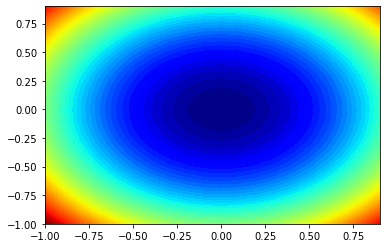

In [ ]:
# Source: https://machinelearningmastery.com/adam-optimization-from-scratch/
from numpy import arange,asarray
from numpy import meshgrid
from matplotlib import pyplot

# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# Countour Plot
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()

- Objective function in this example is $x^2+y^2$ which we want to minimize. This function is paraboloid with minima at $(0,0)$.
- It's derivative of this function $z^2 = x^2+y^2$ is $[2x,2y]$.

In [ ]:
# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

The function $adam$ takes input as:
- objective function
- derivative function
- bounds (this decides what range of $'x'$ values should we look for and what range of $'y'$ values should we look for)
- number of iterations
- $\alpha$ (learning rate)
- $\beta_1 = 0.9$
- $\beta_2 = 0.99$
- $\epsilon = 10^{-8}$.
  <img src='https://drive.google.com/uc?id=1mzcm4Z5w9rWBa5j3pLDFRvF4qTb-SjBE'>

In [ ]:
# gradient descent optimization with adam for a two-dimensional test function
from math import sqrt

def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
	# generate an initial point
	x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	score = objective(x[0], x[1])
	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent updates
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(x[0], x[1])
		# build a solution one variable at a time
		for i in range(x.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			# mhat(t) = m(t) / (1 - beta1(t))
			mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
			x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
		# evaluate candidate point
		score = objective(x[0], x[1])
		# report progress
		print('>%d f(%s) = %.5f' % (t, x, score))
	return [x, score]


In [ ]:
from numpy.random import rand
from numpy.random import seed

# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 200
# steps size
alpha = 0.01
# factor for average gradient
beta1 = 0.9
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.15595599  0.43064899]) = 0.20978
>1 f([-0.145977    0.42065563]) = 0.19826
>2 f([-0.13603507  0.41067354]) = 0.18716
>3 f([-0.12614791  0.4007075 ]) = 0.17648
>4 f([-0.11633502  0.39076241]) = 0.16623
>5 f([-0.10661771  0.38084331]) = 0.15641
>6 f([-0.09701924  0.37095534]) = 0.14702
>7 f([-0.08756476  0.36110378]) = 0.13806
>8 f([-0.07828138  0.35129396]) = 0.12954
>9 f([-0.069198    0.34153134]) = 0.12143
>10 f([-0.06034522  0.33182142]) = 0.11375
>11 f([-0.05175509  0.32216978]) = 0.10647
>12 f([-0.0434607   0.31258203]) = 0.09960
>13 f([-0.03549582  0.30306384]) = 0.09311
>14 f([-0.02789425  0.29362089]) = 0.08699
>15 f([-0.02068916  0.28425885]) = 0.08123
>16 f([-0.01391234  0.27498341]) = 0.07581
>17 f([-0.00759336  0.26580023]) = 0.07071
>18 f([-0.00175872  0.25671492]) = 0.06591
>19 f([0.003569   0.24773306]) = 0.06138
>20 f([0.00837182 0.23886017]) = 0.05712
>21 f([0.01263706 0.23010166]) = 0.05311
>22 f([0.01635771 0.22146288]) = 0.04931
>23 f([0.01953273 0.21294904]

#### AutoEncoder: Recap

- AutoEncoder takes data in high dimension space. It is passed to Encoder MLP and compresses it into $32$-dim. Note that for MNIST image dataset, input is sparse (images are greyscale) where output of Encoder layer is dense.
  <img src='https://drive.google.com/uc?id=1F3CtV5UNnUga_5V6MOiYFwYCMtkiV3kf'>
- When we take this dense $32$-dim vector and pass it to Decoder MLP from which we try to reconstruct $784$-dim such that output and input are as close as possible. This is how an AutoEncoder for Dimensionality reduction works.

#### Denoising AE

Simple application of AE is Denoising.

In [ ]:
from keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
(x_train, _), (x_test, _) = mnist.load_data()

#Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#add NOISE
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_train_noisy.shape)
print(x_test.shape)
print(x_test_noisy.shape)

(60000, 784)
(60000, 784)
(10000, 784)
(10000, 784)


- Here we import MNIST dataset, normalize it, reshape it and add noise to X_train to get X_train_noisy.
- We have $60K$ training dataset each with $784$-dim. After adding noise, we clip noisy data between 0 and 1. As after multiplying with $N(0,1)$, we could get values beyond 0 and 1. But since we are dealing with image data which was normalized, we need to do this clipping.

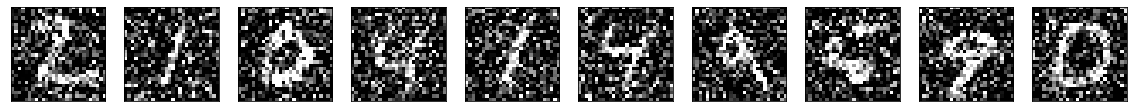

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Above plot is for noisy training dataset

In [ ]:
#AutoEncoder model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Compile and Fit
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, # NOTE: input is noisy, output is non-noisy
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
235/235 [==============================] - 5s 5ms/step - loss: 0.2696 - val_loss: 0.2194
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1925 - val_loss: 0.1734
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1664 - val_loss: 0.1592
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1566 - val_loss: 0.1525
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1514 - val_loss: 0.1485
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1480 - val_loss: 0.1455
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1447 - val_loss: 0.1422
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1418 - val_loss: 0.1397
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1393 - val_loss: 0.1374
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1370 - val_lo

Note, that input to Encoder layer is noisy training data and target is clean training dataset.

After 100 epochs, training and validation loss are pretty close

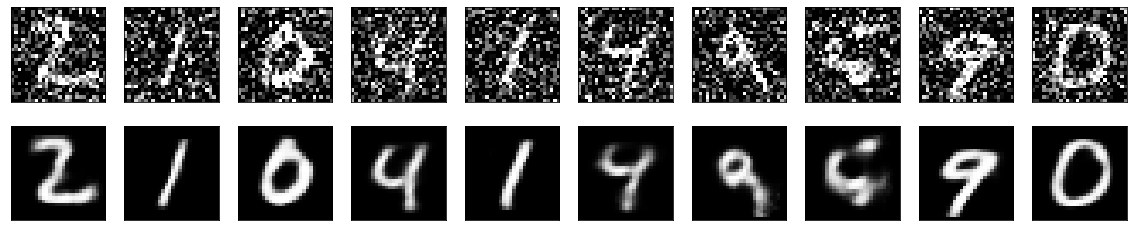

In [ ]:
#Visualize the outputs

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Whole Encoder-Decoder is learning a mathematical function that takes noisy image and gives clean image. $784$-dim (noisy) has to be very close to $784$-dim of output.

#### Adding Sparsity constraint to Encoded Representation:

- In the below example, we have 32 neurons to generate sparse vector. There is a special regularizer (activity regularizer). Typically for regularization we have seen $L_1$ regularizer which creates sparsity in weights and bias.
  <img src='https://drive.google.com/uc?id=1lCAI48IXfwwV1_J_3QMlPJK2sDTpd8wf'>
- In loss function, we try to minimize loss that is binary cross entropy. Regularization is used so that we have sparse data. Sparse data is easier to work with for certain set of algorithms.
  <img src='https://drive.google.com/uc?id=1lculcpcJzKPCOpo_1DSaZMxatMbA563f'>

***Question:*** But why do we want the 32 dim vector to be sparse? Isn't it already condensed? If we make it sparse, will we not have loss of information?

***Answer:***
- Note, that if $32$-dim vector becomes more and more sparse, then loss will increase as well.
- So we want to find out to what extend can we make it parse without increasing loss.
  <img src='https://drive.google.com/uc?id=1--aS6lJQzCDo0eNxt4h__UsWSeOj51nj'>


***Question:*** If I use all linear activation, will it similar to PCA?

***Answer:***
- No. It would be the case as long as column vector are orthogonal.
  <img src='https://drive.google.com/uc?id=1hXEyGfSaXtqDcQs6epVbgd0m6dKzN7TS'>


#### Practical tips

- For tabular data, we can try MLPs but typically they don't out perform ensembles.
- For image data, we can use Convolution Neural Network (CNN) that will be covered in Computer Vision.
- For time-series data, we can use LSTMs that will be covered in NLP.
- For textual data, we can use LSTMS or Transformers.
  <img src='https://drive.google.com/uc?id=1uSbp_uK79AymgjcLaaugZQ6y3OMSzGqd'>


In MLPs:
- Batch-size is determined by size of the cores, on which data will be trained.
- As layers increases, so will overfitting. Same is the case of neurons per layer.
- ReLu is more popular and widely used activation function. If there are lots of dead neurons then we can switch to leaky ReLu/PReLu.
  <img src='https://drive.google.com/uc?id=12gjQKCKxc-XMwSsdTPRYRcKK5OZoTttd'>


- If we have internal covariate shift, we use Batch Normalization. In practise, it is good to use as it speeds up convergence and add regularization.
- To reduce overfitting, we can increase dropout rate. Note that if dropout increases, convergence rate decreases as well.
  <img src='https://drive.google.com/uc?id=1aRE0QhSSIajT4fjKOU6MJ5MSF0Q0h3CV'>


- ADAM is commonly used optimizer. We can adjust $\alpha, \beta_1, \beta_2$ base on speed of convergence.
- We should check for exploding gradients and vanishing gradients as well.
  <img src='https://drive.google.com/uc?id=11SB4VGVwhkrLyxPYASKJnaxEq3N3hc15'>


- Loss function should be differentiable.
  <img src='https://drive.google.com/uc?id=13NeeXPpyianbt_iQ0jt2M3hKSkquw0yF'>


- Weights are initialized using either He (for ReLu) or Glorot (default) method.
  <img src='https://drive.google.com/uc?id=1QVmBLfXFyBbzibn_lW5x1GyoH-Qw2i0i'>


***Question:*** What happens if we initialize all weights to the same value?

***Answer:***
- If we have ReLu activation function and all weights are set to 0, then we will end up with dead neurons.
  <img src='https://drive.google.com/uc?id=1QVmBLfXFyBbzibn_lW5x1GyoH-Qw2i0i'>
- If we have ReLu activation function and all weights are set to same value other than non-zero (let say 0.5), then all the weights in each layer will change in unison. This is also known as symmetry problem.
- Simplest way to break symmetry is randomly initialize weights.
  <img src='https://drive.google.com/uc?id=1EeMDPEjI-RGoYHsV_EPwvK5tuLftFX_9'>

#### Disadvantages of MLP:

- Spatial pattern is broken when $28*28$ image is transformed into $784*1$ dimensions.
- Hence, MLP don't work well on image. There is a special class of algorithm (CNN) which uses concept of convolution in Image processing.  
  <img src='https://drive.google.com/uc?id=1VY23CxPK8M_cnRC8khARYll4E11OlPPA'>

- If we pass sequence of words to MLP, then it doesn't take sequence into consideration.
- LSTMs is used for such purpose.  
  <img src='https://drive.google.com/uc?id=1dx2Y0R9Yr8rfJS88yvsSvNXaF5gJ-AqS'>

***Question:*** So mostly MLP's use-case is classification (that too multi-class), AE. Do we even use it for regression (or our first choice would be linear regression, ensemble)?

***Answer:***
- Start with Linear models, then try out ensembles followed by MLP.

***Question:*** Do we have problem of dead neurons for Sigmoid as well?

***Answer:***  
- No, in Sigmoid $\sigma(w^Tx_i+b) = 0.5$, when $w^Tx_i+b = 0$.
- ReLu's have dead neurons problem and not Sigmoid.
  <img src='https://drive.google.com/uc?id=1u44pIggorQhAyqb_pQB51Sqs2YblGBcz'>